In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# for this demo we just keep one-third of the data
data = pd.read_csv("https://datahack2020dataset.s3.us-east-2.amazonaws.com/OfficialCompetitionDataset.csv")
data.pop('Unnamed: 0')

print(f'data dimensions: {data.shape}')

data dimensions: (26504, 25)


In [2]:
data.head()

,name,album,artist,auditory,beats_per_measure,beats_per_min,concert_probability,critic,critic_rating,danceability,...,major/minor,nplays,positivity,review,reviewer_type,song_debut,styles,tone,volume,vulgar
0,A Forgotten Chapter In The History Of Ideas,VI,the fucking champs,0.24030,4.0,175.934,32.00,adam moerder,70.0,1.216527,...,major,5026,-0.676431,\r\n What an opportune time for a Fucking C...,NaN,2007-04-24,rock,C#,0.794281,NOT VULGAR
1,I Would Like to Write a Song That...,Muted,alias,0.02061,4.0,97.017,24.40,william morris,60.0,1.382647,...,major,7823,-0.684217,"Listen up, kids; it's time for me to play like...",NaN,2003-10-28,"electronic, rock",D,0.760773,NOT VULGAR
2,Awake On A Train,Yesterday Was Dramatic – Today Is OK,mm,0.88200,4.0,110.005,9.99,matt lemay,91.0,1.469614,...,major,161260,0.016498,"Surprises are the best. Once, when I was in ki...",contributor,2005-10-04,"electronic, rock",F,0.738168,NOT VULGAR
3,Dress,Sylvan Esso,sylvan esso,2.57100,4.0,139.955,10.50,ian cohen,62.0,1.958150,...,minor,14379524,-0.964502,There are bands that arrive fully formed with ...,contributor,2014-05-13,pop/r&b,F,0.824472,NOT VULGAR
4,People Die,Travistan,travis morrison,0.22140,3.0,144.033,35.00,chris dahlen,0.0,2.377382,...,minor,4549,1.857820,Travis Morrison got his ass kicked. He tells ...,NaN,2004,pop/r&b,F,0.777020,NOT VULGAR


In [12]:
numerical_data = data.copy()

In [13]:
ignore_cols = ['name', 'album', 'artist', 'critic', 'review', 'reviewer_type', 'song_debut', 'styles']
numerical_data = numerical_data.drop(ignore_cols, axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

categorical_cols = ['major/minor', 'vulgar', 'tone']

for col in categorical_cols:
    numerical_data[col] = LE.fit_transform(numerical_data[col])

In [15]:
numerical_data.head()

,auditory,beats_per_measure,beats_per_min,concert_probability,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,major/minor,nplays,positivity,tone,volume,vulgar
0,0.24030,4.0,175.934,32.00,70.0,1.216527,1.0,0.627541,1.060468,388200,8.0,0,5026,-0.676431,5,0.794281,0
1,0.02061,4.0,97.017,24.40,60.0,1.382647,0.6,0.575489,1.256408,252560,7.0,0,7823,-0.684217,6,0.760773,0
2,0.88200,4.0,110.005,9.99,91.0,1.469614,4.0,0.498955,1.125781,563253,3.0,0,161260,0.016498,9,0.738168,0
3,2.57100,4.0,139.955,10.50,62.0,1.958150,8.8,0.456158,-0.844109,229840,9.0,1,14379524,-0.964502,9,0.824472,0
4,0.22140,3.0,144.033,35.00,0.0,2.377382,0.4,0.400788,-0.844077,262627,8.0,1,4549,1.857820,9,0.777020,0


In [7]:
scale_features = ['auditory', 'beats_per_min', 
                  'concert_probability', 'critic_rating', 
                  'danceability', 'hotness', 
                  'hype', 'instrumentalness',
                  'length_minutes', 'positivity', 
                  'volume', 'nplays']

for col in scale_features:
    numerical_data[col] = (numerical_data[col]-numerical_data[col].min()) / (numerical_data[col].max() - numerical_data[col].min()) 

In [16]:
numerical_data.head()

,auditory,beats_per_measure,beats_per_min,concert_probability,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,major/minor,nplays,positivity,tone,volume,vulgar
0,0.24030,4.0,175.934,32.00,70.0,1.216527,1.0,0.627541,1.060468,388200,8.0,0,5026,-0.676431,5,0.794281,0
1,0.02061,4.0,97.017,24.40,60.0,1.382647,0.6,0.575489,1.256408,252560,7.0,0,7823,-0.684217,6,0.760773,0
2,0.88200,4.0,110.005,9.99,91.0,1.469614,4.0,0.498955,1.125781,563253,3.0,0,161260,0.016498,9,0.738168,0
3,2.57100,4.0,139.955,10.50,62.0,1.958150,8.8,0.456158,-0.844109,229840,9.0,1,14379524,-0.964502,9,0.824472,0
4,0.22140,3.0,144.033,35.00,0.0,2.377382,0.4,0.400788,-0.844077,262627,8.0,1,4549,1.857820,9,0.777020,0


In [17]:
y = numerical_data.pop('nplays')

In [18]:
numerical_data

,auditory,beats_per_measure,beats_per_min,concert_probability,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,major/minor,positivity,tone,volume,vulgar
0,0.240300,4.0,175.934,32.00,70.0,1.216527,1.0,0.627541,1.060468,388200,8.0,0,-0.676431,5,0.794281,0
1,0.020610,4.0,97.017,24.40,60.0,1.382647,0.6,0.575489,1.256408,252560,7.0,0,-0.684217,6,0.760773,0
2,0.882000,4.0,110.005,9.99,91.0,1.469614,4.0,0.498955,1.125781,563253,3.0,0,0.016498,9,0.738168,0
3,2.571000,4.0,139.955,10.50,62.0,1.958150,8.8,0.456158,-0.844109,229840,9.0,1,-0.964502,9,0.824472,0
4,0.221400,3.0,144.033,35.00,0.0,2.377382,0.4,0.400788,-0.844077,262627,8.0,1,1.857820,9,0.777020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26499,1.719000,3.0,179.885,37.10,75.0,1.375751,4.4,0.463105,1.283622,340133,7.0,0,-1.318363,4,0.716484,0
26500,0.030600,4.0,122.984,6.75,58.0,1.890800,3.6,0.657002,1.261851,348787,5.0,0,1.102605,4,0.811926,0
26501,0.000023,4.0,110.356,25.90,68.0,1.499303,9.2,0.591114,-0.719056,288640,2.0,0,-0.170359,6,0.851976,0
26502,1.290000,4.0,59.672,10.50,72.0,1.447735,9.2,0.427879,-0.844369,301027,7.0,0,-0.742610,10,0.733683,1


In [19]:
y

0            5026
1            7823
2          161260
3        14379524
4            4549
           ...   
26499      566540
26500      394374
26501     6264446
26502    10487136
26503        6094
Name: nplays, Length: 26504, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numerical_data, y, test_size=0.2)

In [21]:
from xgboost import XGBRegressor

reg = XGBRegressor(max_depth=16, n_estimators=1000, learning_rate=0.10, gamma=3)

In [22]:
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
reg.score(X_test, y_test)

0.35617722585566747

In [25]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'learning_rate': np.arange(0.01, 0.41, 0.05),
    'max_depth': np.arange(3, 13, 1),
    'min_child_weight': np.arange(5, 9, 1),
    'gamma': np.arange(1, 11, 1)
}

search = RandomizedSearchCV(reg, params, n_iter=5, scoring='neg_mean_squared_error', random_state=0)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=3,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=16, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=1000, n_jobs=12,
                                          num_parallel_tree...
                                          scale_pos_weight=1, subsample=1,
                                          tree_method='exact',
                             

In [28]:
search.best_estimator_.score(X_test, y_test)

0.6119020081259284

In [29]:
numerical_data.isnull().sum()

auditory               0
beats_per_measure      0
beats_per_min          0
concert_probability    0
critic_rating          0
danceability           0
hotness                0
hype                   0
instrumentalness       0
length_minutes         0
lyricism               0
major/minor            0
positivity             0
tone                   0
volume                 0
vulgar                 0
dtype: int64

<AxesSubplot:>

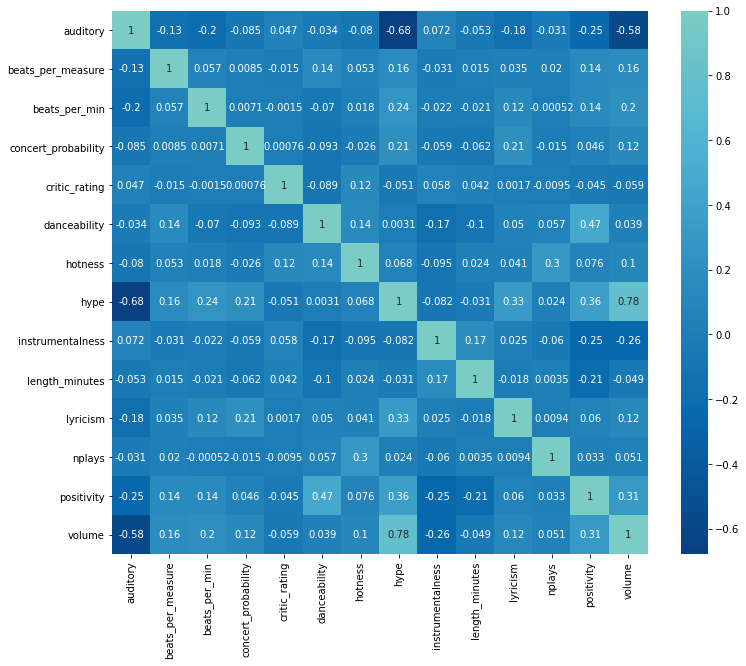

In [31]:
correlations = data.corr()
fig = plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)

In [37]:
numerical_data = numerical_data.drop(['hotness'], axis=1)

In [38]:
numerical_data = numerical_data.drop(['critic_rating'], axis=1)